## Тема “Обучение без учителя”

### Задание 1

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [74]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


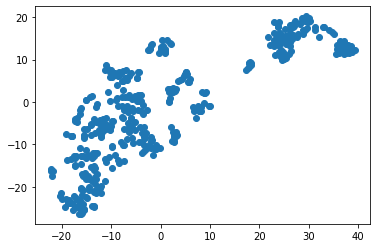

In [75]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2

In [76]:
from sklearn.cluster import KMeans

In [77]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

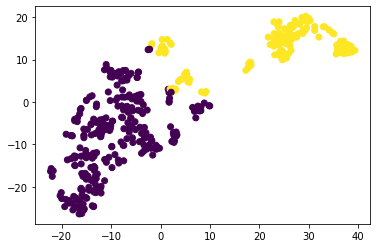

In [78]:
train_labels = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [79]:
print('Кластер 0: среднее значение price {}, среднее значение CRIM {}'.format(y_train[train_labels == 0].mean(), X_train.loc[train_labels == 0, 'CRIM'].mean()))

Кластер 0: среднее значение price 24.958115183246072, среднее значение CRIM 0.42166020942408367


In [80]:
print('Кластер 1: среднее значение price {}, среднее значение CRIM {}'.format(y_train[train_labels == 1].mean(), X_train.loc[train_labels == 1, 'CRIM'].mean()))

Кластер 1: среднее значение price 16.165354330708663, среднее значение CRIM 10.797028425196853


### Задание 3

In [81]:
X_test_TSNE = model.predict(X_test_scaled)


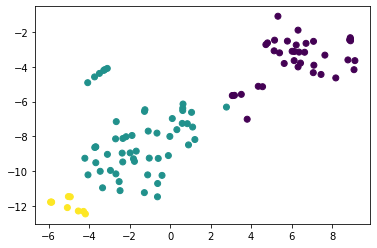

In [82]:
test_labels = model.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)

plt.show()

In [83]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [84]:
print('Кластер 0: среднее значение price {}, среднее значение CRIM {}'.format(y_test[test_labels == 0].mean(), X_test.loc[test_labels == 0, 'CRIM'].mean()))

Кластер 0: среднее значение price 16.710526315789473, среднее значение CRIM 9.419181842105264


In [85]:
print('Кластер 1: среднее значение price {}, среднее значение CRIM {}'.format(y_test[test_labels == 1].mean(), X_test.loc[test_labels == 1, 'CRIM'].mean()))

Кластер 1: среднее значение price 22.690909090909095, среднее значение CRIM 0.21929690909090907


In [86]:
print('Кластер 2: среднее значение price {}, среднее значение CRIM {}'.format(y_test[test_labels == 2].mean(), X_test.loc[test_labels == 2, 'CRIM'].mean()))

Кластер 2: среднее значение price 34.3111111111111, среднее значение CRIM 0.04070333333333334
